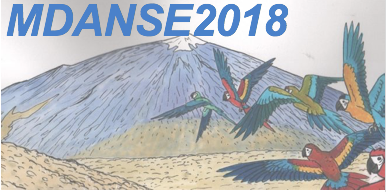!
# MDANSE2018 ASE Tutorial

## Introduction
The Atomic Simulation Environment (ASE) is exactly what it says it is, an environment for atomic simulations. Its primarily usage is as a python module, but there is also a very simple graphical user interface. However, this tutorial will focus on scripting with python. Although we will use the GUI for visualization. 

ASE contains objects and structures for atomic structures as well as for calculators. Given an atomic structure, a calculator can return the forces acting on the individual atoms as well as the energy of the system. The strength of ASE is that it interfaces to several programs for calculating forces and energy, such as simple pair potentials and molecular mechanics / force field programs (e.g. LAMMPS), effective medium theory (e.g. ASAP), tight binding (e.g. DFTB), and density functional theory (e.g. abinit, CASTEP, GPAW). The many calculators are listed below;
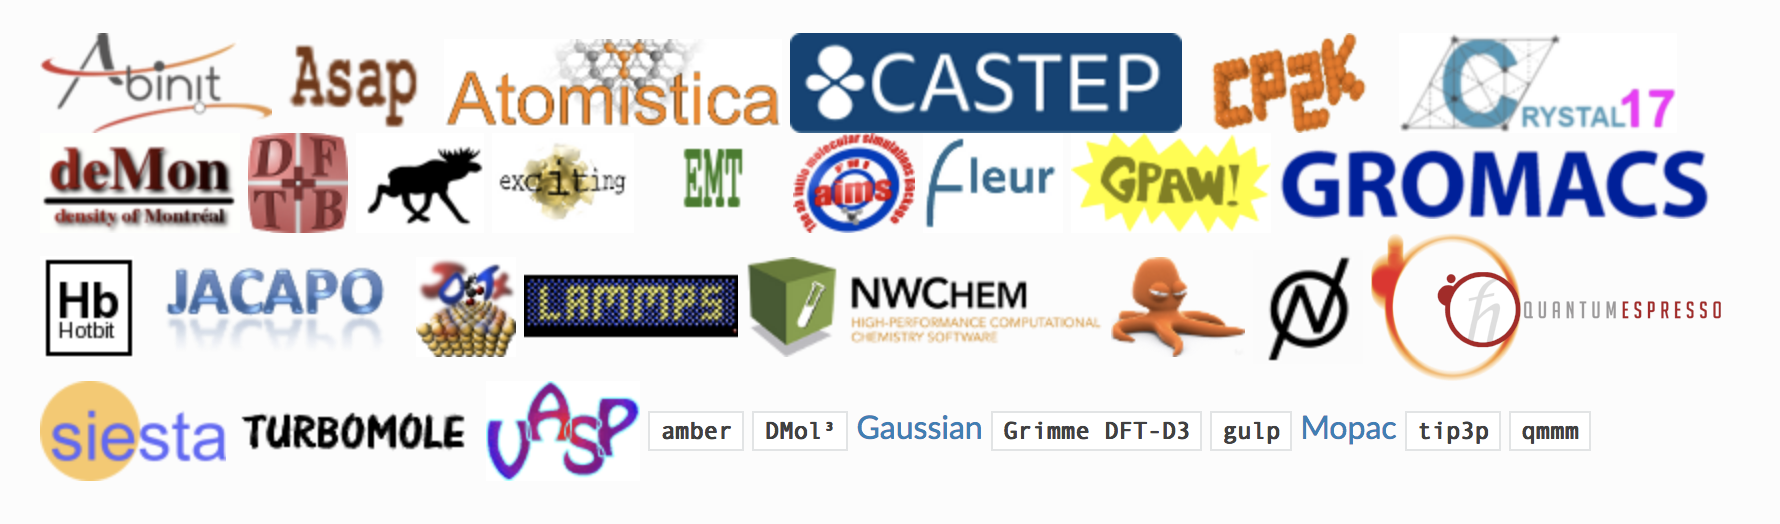

ASE was initiated at Department of Physics, Technical University of Denmark approximately 20 years ago as an interface to their locally developed DFT program dacapo, but today many university groups world wide contribute and as mentioned it interfaces to many programs. 


It has also caught the attention at many neutron sources, but so far ASE does not contain functionality specific for neutron scattering. However, there is an x-ray scattering module that can be used to calculate the x-ray scattering from nano-particles and there is also a module for infrared spectroscopy.

### Tutorials and other material
ASE is well documented and has many tutorials and examples that it is worth looking at. Some important links:

Homepage: https://wiki.fysik.dtu.dk/ase/index.html

Tutorials: https://wiki.fysik.dtu.dk/ase/tutorials/tutorials.html

Module descriptions: https://wiki.fysik.dtu.dk/ase/ase/ase.html

Perhaps most important is the search function on the homepage:

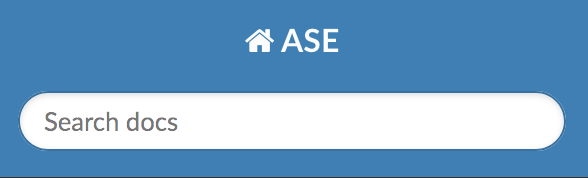


***Learning by doing*** ASE is probably best learned by doing, which is what we will do in this tutorial

### This tutorial

In this tutorial we will learn about the basic concepts in the Atomic Simulation Environment:

1. The Atom and Atoms objects and how to construct atomic structures with and without periodic boundary condistions
2. Calculators and dynamics for optimizing structures and molecular dynamics
3. Vibrations / Phonon calculations

The purpose is to demonstrate the powerful functionality of ASE rather for performing atomic simulations rather than discuss specific computational methods.

The tutorial requires that the following python modules are installed:
1. ase
2. matplotlib
3. pandas

Optional:
4. gpaw for DFT calculations
5. nglview for rich visualization

These packages should be pre-installed on the virtual machine

## Python and numpy
If you are not familiar with python and numpy it is recommmended to go through the following tutorials on the ASE homepage:

1. Python: https://wiki.fysik.dtu.dk/ase/python.html
2. Arrays in NumPy: https://wiki.fysik.dtu.dk/ase/numpy.html#numpy

It's particularly important to pay attention to so-called iterables, noticeably `list`, `dictionary`, and the numpy `array`

## Some hints

In [ ]:
help([])

The `help` function output the documentation for an object

In [ ]:
help(dict())

Another way to get help with Jupyter and ipython os to use the '?' at the end of an object

In [ ]:
dict?

Typing the name of an object on the last line in a cell output information about the object

In [ ]:
a = dict(a=3, b=5)
a

but it has to be on the last line. The following will not create an output

In [ ]:
b = range(10)
b
c = 3

unless we use `print`

In [ ]:
b = range(10)
print(b)
c = 3

The wonderful **`TAB`** key. `TAB` invokes auto-completion.

Try type "l" immediately followed by TAB in the cell below and see what happens

It list the ways that the "l" can be completed. If there is only one option, it will just complete your input for you. If you type "li" followed by `TAB` it will list those starting with "li" and so on. Note that you can select from the drop down menu that appears.

Try to type 'from ase import ' followed by `TAB`. 

In [ ]:
from ase import Atom

Now all the ase modules that can be imported are listed. Note that it also works for paramters, file names, etc.

## The Atom object

In ASE an atom is represented by an instance of an Atom class

In [ ]:
import numpy as np
from ase import Atom  # We first need to import the class
hydrogen = Atom('H')
hydrogen

The atom instance has properties and methods attached to it, most noticealy the `position`

In [ ]:
hydrogen.position

In [ ]:
hydrogen.position = np.array([1.,2.,3.])
hydrogen

We can set it all at once

In [ ]:
hydrogen1 = Atom('H', position=np.array([0.,0.,-0.5]))
hydrogen2 = Atom('H', position=np.array([0.,0.,+0.5]))
hydrogen1, hydrogen2

## The Atoms object
The `Atoms` object represent an atomic structure, i.e. a list of atoms. We can put our two hydrogen atoms together to form a molecule

In [ ]:
from ase import Atoms
h2 = Atoms([hydrogen1, hydrogen2])
h2

the `pbc` is short for "periodic boundary conditions" and when it is `False` it indicates that the structure does not have periodic boundary conditions

We can access the atomic positions of our H2 molecule in two ways:

In [ ]:
h2.positions

In [ ]:
h2.get_positions()

**Copies and references**.
The difference is that the attribute `positions` returns a reference to the positions of the structure, whereas the method `get_positions()` returns a copy of the positions of the structures. We can see that in the following ways:

In [ ]:
pos1 = h2.positions
pos2 = h2.get_positions()

In [ ]:
pos1 is h2.positions

In [ ]:
pos2 is h2.positions

In [ ]:
pos2 == h2.positions

What the above says is that `pos1` is the same as `h2.positions` whereas `pos2` is a copy, it has the same value as `h2.positions` as indicated by `==`, whereas the `is` comparison is False.

This means we can change the value of `pos2` without modifying the structure of `h2`, but if we change `pos1` we also change the structure of `h2`. Let's try it out;

In [ ]:
pos2[0] = 1000.
pos2

In [ ]:
h2.positions

Nothing changed! but ...

In [ ]:
pos1[0] = 999.
pos1

In [ ]:
h2.positions

Thus modifying `pos1` automatically modifies `h2.positions` because they are the same objects. Welcome to the magic of Object Oriented Programming!

There are easier ways that we can create an atomic structure (in technical terms: Instantiate the Atoms class)

In [ ]:
atoms = Atoms('H2O')
atoms

a list of atoms indicated by chemical symbol or atomic number can also be used

In [ ]:
atoms = Atoms(['H', 1, 'O'])
atoms

or tupples for that matter

In [ ]:
atoms = Atoms(2*('H',) + ('O',))
atoms

order matters;

In [ ]:
Atoms('HHO').get_chemical_symbols(), Atoms('HOH').get_chemical_symbols(), Atoms('OH2').get_chemical_symbols()

It may seem weird, but the order is important once we assign properties to the individual atoms, such as positions. 

The `Atoms` object is an iterable


In [ ]:
for atom in atoms: print(atom)

Thus each atom is represented by an instance of the class 'Atom'
We can also slice Atoms in the same way as lists

In [ ]:
atoms[0]

In [ ]:
atoms[-1]

In [ ]:
atoms[1:]

In [ ]:
len(atoms)

In [ ]:
H1, H2, O = atoms

In [ ]:
O

### Constructing a water molecule from scratch

A water molecule is fundametally a terahedral structure with the oxygen atoms in the center and the two hydrogen atoms and two lone pairs at the corners. The angle between two bonds in a fully symmetrical tetrahedron is 109 degrees. The lengths of the O-H bonds can be estimated from the atoms covalent radii. We will place the oxygen in origon and the two hydrogen atoms in the yz plane symmetrically around the z-axis.

*Hint* the cos and sim functions as well pi can be obtained from the numpy module by `np.cos`, `np.sin`, and `np.pi`.

*Hint* the covalent radii can be obtained from the `ase.data.covalent_radii`.

In [ ]:
water = Atoms('OH2') # placing oxygen first

# calculate bond length
from ase.data import covalent_radii
radius_h = covalent_radii[1]  # indexed by atomic number
radius_o = covalent_radii[8]
bondlength = radius_h + radius_o

# calculate x and y projections of unit vector pointing along the o-h bond 
angle = 109.*np.pi/180. # converting to radians
xu = np.cos(angle/2)
yu = np.sin(angle/2)

# set positions

# method 1  (indexig on atoms)
water[1].position = bondlength*np.array([0, xu, yu])
water[2].position = bondlength*np.array([0, xu, -yu])
water.positions

In [ ]:
# method2 (indexing on positions)
water.positions[1] = bondlength*np.array([0, xu, yu])
water.positions[2] = bondlength*np.array([0, xu, -yu])
water.positions

In [ ]:
# method3 (coordinate by coordinate)
pos = water.positions  # for laziness reasons
pos[1,1] =  bondlength*xu
pos[1,2] =  bondlength*yu
pos[2,1] =  bondlength*xu
pos[2,2] = -bondlength*yu
water.positions

In [ ]:
# method4 the one-liner (the power of numpy arrays)
water.positions[1:, 1:] = bondlength*np.array( [[xu, yu], [xu, -yu]])
water.positions

## Visualization

ASE supports many molecular viewers. For embedded views in Jupyter notebooks it supports two, the x3d  and nglviewer. Other viewers will open a new window.

In [ ]:
from ase.visualize import view

The simple ase gui is default

In [ ]:
view([water, water])  # Yes! it is possible to scale, rotate and move

**Note**, depending on the detailed setup, it may be possible to invoke other molecular viwers, e.g. Avogadro, from the menu of this viewer. (look at the bottom of the "View" dropdown menu.

For some more bling directly in the Jupyter notebook use the nglviewer, but it may not work

In [ ]:
try:
    view(water, viewer='ngl')  # the color scheme can be changed to 'element'.
except AttributeError:  # in case it does not work 
    print("""nglviewer does unfortunately not work with the current setup
    
You can google "ngl jupyter" to find out how to fix it!

    """)
    

### Exercise 1: Construct a molecule
H2S has an H-S-H angle of 90 degrees, construct an ASE molecule representing H2S using bond lengths based on covalent radius.

*Hint* See below, in case you don't know the atomic_number of sulfur (but who doesn't?)

In [ ]:
sulfur = Atom('S')
sulfur.number  # atomic number

alternatively

In [ ]:
from ase.data import atomic_numbers
atomic_numbers['S']

In [ ]:
sh2 = 'replace this string with your code'

### Question 1: What is the distance between the two hydrogen atoms?

***Hint*** Look at which methods the `Atoms` class have that start with `get_` by using the `TAB` method

In [ ]:
'replace with your code'

The following cell should just be executed. It is needed for assesing your answer

***Python2 Disclaimer*** Following cell only works with Python3

In [ ]:
# Just execute this field
import hashlib
def test_distance(distance_between_hydrogen_atoms_in_h2s):
    """
    Test that the distance between the two hydrogen atoms is correct
    
    """
    dist_string = '{:.4}'.format(distance_between_hydrogen_atoms_in_h2s).encode('UTF-8')
    encrypted_string = hashlib.blake2b(dist_string).hexdigest()
    try:
        assert encrypted_string == '55232a4e52a21e7592e0d53dde956c473a524a57bf1ead0898485ebe20d24e7f891d4c59fcfb54bebdbd4e22f4e406cf48a317840116675a9dde6abf2c701a5e'
    except:
        print('Test failed!')
    else:
        print('Test passed!')
    

In [ ]:
try:
    test_distance(sh2.get_distance(1,2))
except AttributeError, exc:
    import sys
    if sys.version_info < (3,0):
        print("This does not work with Python 2. Ask for the answer")
    else:
        raise exc
    

### Exercise
Visualize your SH2 molecule:

In [ ]:
'replace with your code'

## Trajectory
In ASE a trajectory is simply a file with an ordered list of atomic configurations for the same structure, e.g. water. Let's try to stretch the water molecule

Let's first make a function that alters the structure according to an input angle

Let's try to do some smart OOP (but an ordinary function can also do it)

In [ ]:
class Water(Atoms):  # inherit everything from class Atoms
    """
    Defines a water molecule represented by an Atoms object. It will be instantiated with a 
    bondlength equal to the sum of the covalent radii for oxygen and hydrogen and a bond angle 
    of 109. degress.
    
    """
    def __init__(self, *args, **kwargs):  # since we know what a water molecule consists of
        bondlength = covalent_radii[1] + covalent_radii[8]
        positions = [[0,   0,       0],[0,-bondlength,0],[0, bondlength,0]]
        super(Water, self).__init__(*args, 
                                    symbols='OH2', 
                                    positions=positions, 
                                    **kwargs)  # at 180 deg
        self.set_bond_angle(109.*np.pi/180.)  
        
    def set_bond_angle(self,angle):  # in radian
        """
        Changes the position of the hydrogen atoms so that the bond angle becomes `angle`
        """
        bondlength1 = self.get_distance(0,1)  # O-H1 distance
        bondlength2 = self.get_distance(0,2)  # O-H2 distance
        
        xu = np.cos(angle/2.)
        yu = np.sin(angle/2.)
        self[1].position = bondlength1*np.array([0, xu,  yu])
        self[2].position = bondlength2*np.array([0, xu, -yu]) 

In [ ]:
water = Water()
water.positions

In [ ]:
water.get_distance(0,1)

In [ ]:
water.set_bond_angle(np.pi)  # 90 degress
water.positions

In [ ]:
from ase.io import Trajectory
#water_traj = Trajectory('water_stretch.trj')
traj_list = []
angles = np.linspace(0, 2*np.pi, 25)
for angle in angles:  # 25 points from 0 to 360 degress.
    water.set_bond_angle(angle)
    traj_list.append(water[:])  # Note, that we make a copy of the water molecule with the ':'

In [ ]:
print(traj_list[:5])  # showing the first five configs

We can view the dynamics

In [ ]:
try:
    view(traj_list, viewer='ngl')  # see if ngl works
except:
    view(traj_list)

Did you push the `play` button in the viewer? if not, do it now

We can store our 'dynamics' in a trajectory file

In [ ]:
traj_file = Trajectory('water_bend.trj', 'w')  # We use the 'w' to indicate that we want to write to the file
for wat in traj_list: traj_file.write(wat)
traj_file.close()  # remember to close file

We can read our trajectory by:

In [ ]:
trj = Trajectory('water_bend.trj')

The trajectory is iterable:

In [ ]:
water_config = trj[3]
view(water_config)

To demo the power of this for analysis, let's extract the z-coordinates for the two hydrogen atoms

In [ ]:
hzcoors_list = [wat.positions[1:,2] for wat in trj]  # z coordinate for the two hydrogen atoms
hzcoors = np.array(hzcoors_list)

We will look at those data using the `pandas` module

### pandas
pandas is a very powerful tool for visualizing and manipulating data in a structured way (kind of like excel on duracel batteries). 

Homepage: https://pandas.pydata.org/


In [ ]:
import pandas
df = pandas.DataFrame()
df['angles'] = angles
df['H1z'] = hzcoors[:,0]  # z coordinate for hydrogen 1
df['H2z'] = hzcoors[:,1]  # z coordinate for hydrogen 2
df.head()  # show just the five first columns

We can plot the data

In [ ]:
# following line is for getting plot directly in this widget
%matplotlib inline  

# plot z-coordinates as function of angles
df.plot.line(x='angles', y=['H1z', 'H2z'])
#import matplotlib.pyplot as plt
#plt.plot(df['angles'], df['H1z'])

### The G2 dataset
Note that the ASE contains the G2 dataset of small molecules

In [ ]:
from ase.collections import g2

print("""
The G2 data set has {} structures in it.

They are {})

It is {} that it contains H2O

It is {} that it contains SH2

It is {} that is contains gold!

""".format(len(g2.names), ' '.join(g2.names),
           'H2O' in g2.names, 'SH2' in g2.names, 'Au' in g2.names)
     )


ASE can use the G2 data set to construct molecules that exist in G2

In [ ]:
from ase import build
ch3nh2 = build.molecule('CH3NO2')
try:
    view(ch3nh2, viewer='ngl')
except AttributeError:
    view(ch3nh2)

### IO module
We can of course also read and write structures to files. Many formats are supports (see https://wiki.fysik.dtu.dk/ase/ase/io/io.html#module-ase.io)

In [ ]:
ch3nh2.write('ch3nh2.xyz')

print(open('ch3nh2.xyz').read())

In [ ]:
# read molecule from file
from ase import io
my_molecule = io.read('ch3nh2.xyz')
my_molecule

## Calculators
As mentioned ASE interfaces to many calculators. The buildin work horse for demo purpose is EMT (Effective Medium Theory). It is fast but not very accurate (depending on the purpose and atoms) and can only be used for certain elements 

In [ ]:
from ase.calculators.emt import EMT  
water.set_bond_angle(109.)  # reset bond angle to something reasonable

Let's associate the water molecule with the EMT calculator

In [ ]:
# instantiate a specific calculator using the default parameters for EMT
emt_calculator = EMT()  
# associate the calculator to the water molecule
water.set_calculator(emt_calculator)

we can now get the energy and forces of the water molecule that in turn can be used for minimizing the molecule, run MD simulations, and of course for doing physics!

In [ ]:
water.get_potential_energy()

In [ ]:
water.get_forces()

We can change the calculator to something else, e.g. something based on density functional theory

In [ ]:
from gpaw import GPAW # import the GPAW calculator

In [ ]:
gpaw_calculator_default = GPAW()  # istantiate with default parameters
water.set_calculator(gpaw_calculator_default)

In [ ]:
water.get_potential_energy()

ahem ... we will come back to periodic boundary conditions later. For now we just notice that GPAW needs the molecule embedded in a cell for it to work (for defining a grid). Hence, we will simply just add a cell and notice that the bigger the cell is the more expensive the calculation will be for this type of calculations.

In [ ]:
water.set_cell(4.*np.identity(3))  # adding a 4x4x4 Å cell
water.center()  # center water molecule in cell

In [ ]:
water.get_potential_energy()

The two energies are not comparable because they are calculated with different methods (in practise calculators)

Let's calculate the energy again

In [ ]:
water.get_potential_energy()  

Note that it did not calculate the energy again because it already had been calculated. But, if we change the positions

In [ ]:
water.rattle()  # well, rattle the atoms
water.get_potential_energy()

You can see in the beginning of the output that ASE keeps track of what has changed and that it uses the wave function from the last calculation as input for the new one

The default exchange correlation functional is LDA. It can easily be changed to other ones. Both GGA and hybrid ones are supported.

In [ ]:
gpaw_calculator_pbe = GPAW(xc='PBE')

In [ ]:
water.set_calculator(gpaw_calculator_pbe)
water.get_potential_energy()

The GPAW default mode is finite difference, but it also supports plane waves basis set and linear combination of atomic orbitals (LCAO)

In [ ]:
gpaw_calculator_pbe_pw = GPAW(xc='PBE', mode='pw')  #  plane waves
water.set_calculator(gpaw_calculator_pbe_pw)
water.get_potential_energy()

Let us try to find the optimal angle (minimum) energy for the water molecule with the methods.

    We will calculate the energy as function of the angle for the calculators `gpaw_calculator_default' and sacrifize accuracy for speed with the 'emt_calculator'

In [ ]:
angles = np.linspace(90., 120., 11)  # We know the angle is around 105 degrees
angles

Convert to radians

In [ ]:
angles *= np.pi/180.  #  equal to angles = (np.pi/180.)*angles

Let us calculate the energy with both the EMT and GPAW calculators for the above angles

We can iterate over the angles and calculate the energy for each angle. However, it is always a good idea to check the configurations that we are working on before doing the calculations - if possible - to check that everything is as we planned. Therefore we create all the configurations first, like before, and inspect them to see that things are right. 

When we use gpaw in its default mode (which is finite difference method) it is important that the system encountered does not cross the cell edges in directions where the boundary conditions are not periodic. For our system `pbc = False` (i.e. no periodic boundary conditions).

In [ ]:
water = Water()  # initialize water molecule
water.set_cell(4.*np.identity(3))
water.center()  # center molecule in cell to avoid crossing
water_configs = []
for angle in angles:
    water.set_bond_angle(angle)
    water_configs.append(water[:])  # append a copy

In [ ]:
view(water_configs)  # inspect

Does not look right!

### Exercise 3: Fix the bug!
Find out what when wrong in the above trajectory generation.

*Hint* Don't spend too much time on this, but ask for help or look below


The following works

In [ ]:
# We need to fix the Water class
class WaterFix(Water):  
    def set_bond_angle(self,angle):  # in radian
        """
        Changes the position of the hydrogen atoms so that the bond angle becomes `angle`
        """
        bondlength1 = self.get_distance(0,1)  # O-H1 distance
        bondlength2 = self.get_distance(0,2)  # O-H2 distance
        xu = np.cos(angle/2.)
        yu = np.sin(angle/2.)
        self[1].position = bondlength1*np.array([0, xu,  yu]) + self[0].position
        self[2].position = bondlength2*np.array([0, xu, -yu]) + self[0].position

### Question 
What has changed?

In [ ]:
water = WaterFix()  # initialize water molecule
water.set_cell(4.*np.identity(3))
water.center()  # center molecule in cell to avoid crossing
water_configs = []
for angle in angles:
    water.set_bond_angle(angle)
    water_configs.append(water[:])  # append a copy

In [ ]:
view(water_configs)

Looks right!

Now we can do the calculations

In [ ]:
# EMT:
water.set_calculator(emt_calculator)
# let's store the trajectory so that we can inspect it later
traj_emt = Trajectory('traj_emt.trj', 'w')  

# Do the calculations
for angle in angles:
    water.set_bond_angle(angle)
    water.get_potential_energy()
    traj_emt.write(water)  # write config to trajectory file
traj_emt.close()

In [ ]:
# GPAW
water.set_calculator(gpaw_calculator_default)
# let's store the trajectory so that we can inspect it later
traj_gpaw = Trajectory('traj_gpaw.trj', 'w')  

# Do the calculations
for angle in angles:
    water.set_bond_angle(angle)
    water.get_potential_energy()
    traj_gpaw.write(water)  # write config to trajectory file
traj_gpaw.close()

Inspect configurations

In [ ]:
# Read stored trajectories
traj_emt = Trajectory('traj_emt.trj')
traj_gpaw = Trajectory('traj_gpaw.trj')

In [ ]:
view(traj_emt)

In [ ]:
view(traj_gpaw)

Looks okay?

Let's have a look at the energies

In [ ]:
df = pandas.DataFrame()
df['angles'] = angles*180./np.pi
# Calculate angles from configurations as a double check (I actually discoverd a bug this way)
df['angles emt'] = [config.get_angle(2,0,1) for config in traj_emt] 
df['energies emt'] = [config.get_potential_energy() for config in traj_emt]

df['angles gpaw'] = [config.get_angle(2,0,1) for config in traj_gpaw] 
df['energies gpaw'] = [config.get_potential_energy() for config in traj_gpaw]
df

Before we can compare, we need to normalize the plots

In [ ]:
df['normalized emt'] = df['energies emt'] - df['energies emt'].min()
df['normalized gpaw'] = df['energies gpaw'] - df['energies gpaw'].min()
df

In [ ]:
df.plot.line(x='angles', y=['normalized emt', 'normalized gpaw'])

If interested you can elaborate on the above in a number of ways. E.g.:
1. Calculate the EMT energy for angles in the interval [0:180] degress
2. Fit the above curves using e.g. numpy, lmfit or scipy, or pandas if possible
3. Calculate the dependency using another exchange correlation function (the default is LDA)
4. Calculate the dependency using another GPAW mode or another calculator, e.g. abinit or CASTEP or pair potentials!

GPAW Documentation can be found here: https://wiki.fysik.dtu.dk/gpaw/index.html#

### Optimization

In this tutorial we will optimize the structure of a water molecule. We will use the fast but less accurate EMT method, but you will need to find out yourself how to do it by consulting with the ASE documentation (https://wiki.fysik.dtu.dk/ase/index.html)! 

Use the BFGS optimizer, fmax=0.0001, and the following structure as starting point

In [ ]:
water = Water()

### Exercise, what is the bond angle $\angle$(HOH) and O-H distance, $d_{\mathrm{OH}}$

In [ ]:
'...replace this string with your code'

The correct answer is 102.07 degress and 1.10 angstrom

### Question: 
Based on the above result what could a reason be for not finding the minimum bond angle before?
How can we check?

## Vibrations
ASE can also calculate the vibrational modes. Again you should figure out yourself how to do this

### Exercise
Calculate the vibrational modes for the optimized water molecule

### Question
What is the zero-point energy?

*Hint* Use the ASE online documentation to figure out how to do this

*Hint* Use the method `summary` rather than `get_zero_point_energy` to get the zero point energy (the later is buggy)

In [ ]:
from ase.vibrations import Vibrations
vibr = Vibrations(water)
vibr.run()
vibr.summary()

### Visualization of vibration

In [ ]:
vibr.write_mode(n=6)  # write ground state vibrational mode to file
vibr.write_mode(n=-1) # write highest energetic vibrational mode to file


In [ ]:
# read the files
vib0 = Trajectory('vib.6.traj')  # yes you need to know
vib2 = Trajectory('vib.8.traj')  

try:
    view(vib0, viewer='ngl')
except AttributeError:
    view(vib0)

*Remember the `play` button

In [ ]:
try:
    view(vib2, viewer='ngl')
except AttributeError:
    view(vib2)

## Crystals
ASE is really developed for materials science so it can be used to construct all types of materials 0D (e.g. molecules), 1D (e.g. wires), 2D (e.g. surfaces), and 3D materials (e.g. crystals)

Here we will focus on crystals

As an appetizer, let's read the NaH structure

In [ ]:
#NaH cif file as string. Just copied in here, so we do not have to copy extra files
nahs = """
# Part of the Crystallography Open Database
# All data on this site have been placed in the public domain by the
# contributors.
#------------------------------------------------------------------------------
#$Date: 2010-06-10 15:11:07 +0000 (Thu, 10 Jun 2010) $
#$Revision: 1210 $
#$URL: svn://cod.ibt.lt/cod/cif/9/9008680.cif $
#------------------------------------------------------------------------------
#
# This file is available in the Crystallography Open Database (COD),
# http://www.crystallography.net/. The original data for this entry
# were provided the American Mineralogist Crystal Structure Database,
# http://rruff.geo.arizona.edu/AMS/amcsd.php
#
# The file may be used within the scientific community so long as
# proper attribution is given to the journal article from which the
# data were obtained.
#
data_9008680
loop_
_publ_author_name
'Wyckoff, R. W. G.'
_publ_section_title
;
 Second edition. Interscience Publishers, New York, New York
 rocksalt structure
;
_journal_name_full               'Crystal Structures'
_journal_page_first              85
_journal_page_last               237
_journal_volume                  1
_journal_year                    1963
_chemical_formula_sum            'H Na'
_chemical_name_mineral           NaH
_space_group_IT_number           225
_symmetry_space_group_name_Hall  '-F 4 2 3'
_symmetry_space_group_name_H-M   'F m -3 m'
_cell_angle_alpha                90
_cell_angle_beta                 90
_cell_angle_gamma                90
_cell_length_a                   4.880
_cell_length_b                   4.880
_cell_length_c                   4.880
_cell_volume                     116.214
_exptl_crystal_density_diffrn    1.372
_[local]_cod_cif_authors_sg_H-M  'F m 3 m'
_[local]_cod_chemical_formula_sum_orig 'Na H'
_cod_database_code               9008680
_amcsd_database_code             AMCSD#0011011
loop_
_symmetry_equiv_pos_as_xyz
x,y,z
x,1/2+y,1/2+z
1/2+x,y,1/2+z
1/2+x,1/2+y,z
z,-x,y
z,1/2-x,1/2+y
1/2+z,-x,1/2+y
1/2+z,1/2-x,y
-y,z,-x
-y,1/2+z,1/2-x
1/2-y,z,1/2-x
1/2-y,1/2+z,-x
x,-y,z
x,1/2-y,1/2+z
1/2+x,-y,1/2+z
1/2+x,1/2-y,z
-z,x,-y
-z,1/2+x,1/2-y
1/2-z,x,1/2-y
1/2-z,1/2+x,-y
y,-z,x
y,1/2-z,1/2+x
1/2+y,-z,1/2+x
1/2+y,1/2-z,x
-x,y,-z
-x,1/2+y,1/2-z
1/2-x,y,1/2-z
1/2-x,1/2+y,-z
x,-z,-y
x,1/2-z,1/2-y
1/2+x,-z,1/2-y
1/2+x,1/2-z,-y
-z,y,x
-z,1/2+y,1/2+x
1/2-z,y,1/2+x
1/2-z,1/2+y,x
y,-x,-z
y,1/2-x,1/2-z
1/2+y,-x,1/2-z
1/2+y,1/2-x,-z
-x,z,y
-x,1/2+z,1/2+y
1/2-x,z,1/2+y
1/2-x,1/2+z,y
z,-y,-x
z,1/2-y,1/2-x
1/2+z,-y,1/2-x
1/2+z,1/2-y,-x
-y,x,z
-y,1/2+x,1/2+z
1/2-y,x,1/2+z
1/2-y,1/2+x,z
x,z,y
x,1/2+z,1/2+y
1/2+x,z,1/2+y
1/2+x,1/2+z,y
-z,-y,-x
-z,1/2-y,1/2-x
1/2-z,-y,1/2-x
1/2-z,1/2-y,-x
y,x,z
y,1/2+x,1/2+z
1/2+y,x,1/2+z
1/2+y,1/2+x,z
-x,-z,-y
-x,1/2-z,1/2-y
1/2-x,-z,1/2-y
1/2-x,1/2-z,-y
z,y,x
z,1/2+y,1/2+x
1/2+z,y,1/2+x
1/2+z,1/2+y,x
-y,-x,-z
-y,1/2-x,1/2-z
1/2-y,-x,1/2-z
1/2-y,1/2-x,-z
z,x,-y
z,1/2+x,1/2-y
1/2+z,x,1/2-y
1/2+z,1/2+x,-y
-y,-z,x
-y,1/2-z,1/2+x
1/2-y,-z,1/2+x
1/2-y,1/2-z,x
x,y,-z
x,1/2+y,1/2-z
1/2+x,y,1/2-z
1/2+x,1/2+y,-z
-z,-x,y
-z,1/2-x,1/2+y
1/2-z,-x,1/2+y
1/2-z,1/2-x,y
y,z,-x
y,1/2+z,1/2-x
1/2+y,z,1/2-x
1/2+y,1/2+z,-x
-x,-y,z
-x,1/2-y,1/2+z
1/2-x,-y,1/2+z
1/2-x,1/2-y,z
-z,x,y
-z,1/2+x,1/2+y
1/2-z,x,1/2+y
1/2-z,1/2+x,y
y,-z,-x
y,1/2-z,1/2-x
1/2+y,-z,1/2-x
1/2+y,1/2-z,-x
-x,y,z
-x,1/2+y,1/2+z
1/2-x,y,1/2+z
1/2-x,1/2+y,z
z,-x,-y
z,1/2-x,1/2-y
1/2+z,-x,1/2-y
1/2+z,1/2-x,-y
-y,z,x
-y,1/2+z,1/2+x
1/2-y,z,1/2+x
1/2-y,1/2+z,x
x,-y,-z
x,1/2-y,1/2-z
1/2+x,-y,1/2-z
1/2+x,1/2-y,-z
-x,z,-y
-x,1/2+z,1/2-y
1/2-x,z,1/2-y
1/2-x,1/2+z,-y
z,-y,x
z,1/2-y,1/2+x
1/2+z,-y,1/2+x
1/2+z,1/2-y,x
-y,x,-z
-y,1/2+x,1/2-z
1/2-y,x,1/2-z
1/2-y,1/2+x,-z
x,-z,y
x,1/2-z,1/2+y
1/2+x,-z,1/2+y
1/2+x,1/2-z,y
-z,y,-x
-z,1/2+y,1/2-x
1/2-z,y,1/2-x
1/2-z,1/2+y,-x
y,-x,z
y,1/2-x,1/2+z
1/2+y,-x,1/2+z
1/2+y,1/2-x,z
-x,-z,y
-x,1/2-z,1/2+y
1/2-x,-z,1/2+y
1/2-x,1/2-z,y
z,y,-x
z,1/2+y,1/2-x
1/2+z,y,1/2-x
1/2+z,1/2+y,-x
-y,-x,z
-y,1/2-x,1/2+z
1/2-y,-x,1/2+z
1/2-y,1/2-x,z
x,z,-y
x,1/2+z,1/2-y
1/2+x,z,1/2-y
1/2+x,1/2+z,-y
-z,-y,x
-z,1/2-y,1/2+x
1/2-z,-y,1/2+x
1/2-z,1/2-y,x
y,x,-z
y,1/2+x,1/2-z
1/2+y,x,1/2-z
1/2+y,1/2+x,-z
-z,-x,-y
-z,1/2-x,1/2-y
1/2-z,-x,1/2-y
1/2-z,1/2-x,-y
y,z,x
y,1/2+z,1/2+x
1/2+y,z,1/2+x
1/2+y,1/2+z,x
-x,-y,-z
-x,1/2-y,1/2-z
1/2-x,-y,1/2-z
1/2-x,1/2-y,-z
z,x,y
z,1/2+x,1/2+y
1/2+z,x,1/2+y
1/2+z,1/2+x,y
-y,-z,-x
-y,1/2-z,1/2-x
1/2-y,-z,1/2-x
1/2-y,1/2-z,-x
loop_
_atom_site_label
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
Na 0.00000 0.00000 0.00000
H 0.50000 0.50000 0.50000
"""

In [ ]:
open('NaH.cif','w').write(nahs)

In [ ]:
from ase import io
nah = io.read('NaH.cif')
try:
    view(nah, viewer='ngl')
except AttributeError:
    view(nah)

In [ ]:
try:
    view(nah.repeat(3), viewer='ngl')
except AttributeError:
    view(nah.repeat(3))

### Building
Like for the molecule a crystal can be generated by building from scratch, or reading it from a file as above, or by using predefined structures. Some modules of interest in this regard are:
* `ase.build.bulk` (https://wiki.fysik.dtu.dk/ase/ase/build/build.html#)
* `ase.lattice` (https://wiki.fysik.dtu.dk/ase/ase/lattice.html#module-ase.lattice)
* `ase.spacegroup` (https://wiki.fysik.dtu.dk/ase/ase/spacegroup/spacegroup.html#module-ase.spacegroup)


Here we will build a crystal for silver using the `bulk` module

In [ ]:
from ase.build import bulk
ag = bulk('Ag')
ag

Note, that ASE automatically assigned crystal symmetry (fcc) and lattice constant. 

We can override them if we want to. If we change the crystal structure we must also change the lattice constant $a$. For bcc a good starting guess is:

$a = \frac{4}{\sqrt{3}}r_{\mathrm{Ag}}$, where $r_{\mathrm{Ag}}$ is the radius of an Ag atom.

In [ ]:
r_ag = covalent_radii[atomic_numbers['Ag']]
lattice_constant = 4.*r_ag/np.sqrt(3.)
ag_bcc = bulk('Ag', crystalstructure='bcc', a=lattice_constant)
ag_bcc

Let's see which structure is most stable

In [ ]:
ag_fcc = ag[:]
ag_fcc.set_calculator(emt_calculator)
ag_bcc.set_calculator(emt_calculator)
# ensure the number of atoms in both structures are the same
len(ag_fcc) == len(ag_bcc)

In [ ]:
# Calculate the energies
ag_fcc.get_potential_energy(), ag_bcc.get_potential_energy()

## Exercise

Minimize both structures

Use BFGS and fmax=0.001 and EMT

In [ ]:
'...insert your code here'

There is no minimization, because the optimizer optimize the relative position of the atoms in the unit cell, but not the size of the unit cell itself. In this case there is only atom per unit cell. 

Instead we can scale the unit cell and calculate the energy for each scaling

### Equation of state
Let us calculate the equation of state by iterating overr several lattice constants

In [ ]:
scaling_factors = np.linspace(0.65, 1.10, 20)
scaling_factors

Let us plot the energy as function of atomic volume for both bcc and fcc using the EMT calculator

Below you see how this can be done for bcc. 

In [ ]:
cell_bcc = ag_bcc.get_cell()

trj_bcc_file = Trajectory('ag_bcc.trj', 'w')

for factor in scaling_factors:
    ag_bcc.set_cell(factor*cell_bcc, scale_atoms=True)  # set scaled cell
    ag_bcc.get_potential_energy()  # calculate energy
    trj_bcc_file.write(ag_bcc)  # append structure to our list

trj_bcc_file.close()

Now repeat for fcc below

In [ ]:
'... your code here ...'

### Visualize data



In [ ]:
trj_bcc = Trajectory('ag_bcc.trj')
trj_fcc = Trajectory('ag_fcc.trj')

df = pandas.DataFrame()
df['scaling_factors'] = scaling_factors

df['bcc volumes'] = [ag.get_volume() for ag in trj_bcc]
df['bcc energies'] = [ag.get_potential_energy() for ag in trj_bcc]

df['fcc volumes'] = [ag.get_volume() for ag in trj_fcc]
df['fcc energies'] = [ag.get_potential_energy() for ag in trj_fcc]

df

Let us plot the energies as function of volume

In [ ]:
import matplotlib.pyplot as plt

ax = plt.gca()
df.plot.line('bcc volumes', 'bcc energies', ylim=(0,1), xlim=(10,25), ax=ax)
df.plot.line('fcc volumes', 'fcc energies', ax=ax)


fcc seems to be the most stable at all volumes (or maybe there is a bug somewhere). If you fell for it you can try to recalculate using a GGA xc functional.

Again one can fit using various modules, e.g. `lmfit` to find a better estimate of the lattice constant

However, since the calculation of equation of state is a very common calculation, there is a function implemented in ASE for doing exactly this: https://wiki.fysik.dtu.dk/ase/ase/eos.html

In [ ]:
from ase.eos import calculate_eos
eos = calculate_eos(ag_fcc, eps=0.10, trajectory='Ag_eos.traj')
v, e, B = eos.fit()
print('volume = {:.4} Å^3'.format(v))
a = (4 * v)**(1 / 3.0)
print('lattice constant = {:.4} Å'.format(a))

### Phonons

Here we calculate the phonon spectrum for bulk aluminium To this end we will use the `Phonons` class

In [ ]:
from ase.phonons import Phonons

N = 7  # How many times we repeat the unit cell in each direction

ph = Phonons(ag_fcc, emt_calculator, supercell=(N, N, N), 
             delta=0.05)
ph.run()

# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)

We will use the ase.dft.kpoints modules for getting the high symmetry points in the Brillouin zone

In [ ]:
from ase.dft.kpoints import ibz_points, bandpath

# High-symmetry points in the Brillouin zone
points = ibz_points['fcc']
G = points['Gamma']
X = points['X']
W = points['W']
K = points['K']
L = points['L']
U = points['U']

point_names = ['$\Gamma$', 'X', 'U', 'L', '$\Gamma$', 'K']
path = [G, X, U, L, G, K]

# Band structure in meV
path_kc, q, Q = bandpath(path, ag_fcc.cell, 100)
omega_kn = 1000 * ph.band_structure(path_kc)
# Calculate phonon density of states (DOS)
omega_e, dos_e = ph.dos(kpts=(50, 50, 50), npts=5000, delta=5e-4)
omega_e *= 1000  # convert to meV


Do the plotting (could be a good idea to simplify this)

In [ ]:
# Plot the band structure and DOS
plt.figure(1, (8, 6))
plt.axes([.1, .07, .67, .85])
for n in range(len(omega_kn[0])):
    omega_n = omega_kn[:, n]
    plt.plot(q, omega_n, 'k-', lw=2)

plt.xticks(Q, point_names, fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(q[0], q[-1])
plt.ylabel("Frequency ($\mathrm{meV}$)", fontsize=22)
plt.grid('on')

plt.axes([.8, .07, .17, .85])
plt.fill_between(dos_e, omega_e, y2=0, color='lightgrey', edgecolor='k', lw=1)
plt.ylim(0, 35)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel("DOS", fontsize=18)
plt.show()

Visualize the phonons

In [ ]:
# Write modes for specific q-vector to trajectory files
ph.write_modes([l/2 for l in L], branches=[2], repeat=(8, 8, 8), kT=3e-4)
view(Trajectory('phonon.mode.2.traj'))

## Liquid water and MD simulations

If you got so far use the ASE documentation to figure out how set up an MD simulation of a box of water using the TIP4P force field description.

Alternatively, try out something else! You can do (almost) everything with ASE and Python. Do you for instance know you can run many neutron scattering related programs in Python, e.g. Mantid? and of course you can also try out some of the many calculators in ASE or calculate the vibrational energy of CO adsorbed on a Fe surface.

In [ ]:
'... your code here ...'